# Plot Antarctic, depth integrated, cross slope heat transport, online and daily terms

In [1]:
%matplotlib inline

import cosima_cookbook as cc
from cosima_cookbook import distributed as ccd
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import glob
import cmocean.cm as cmocean

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

figdir = '/g/data/v45/akm157/figures/Antarctic_tides_fixed/cross_slope_transport/'

In [2]:
#client = Client(n_workers=4)
# >> dask-scheduler
# >> dask-worker tcp://10.0.64.9:8786 --memory-limit 4e9 --nprocs 6 --nthreads 1 --local-directory /local/g40/amh157
#client = Client('tcp://10.0.64.9:8786', local_dir='/local/g40/amh157')
client = Client()
client

Client Scheduler: tcp://127.0.0.1:34317 Dashboard: /proxy/8787/status,Cluster Workers: 8 Cores: 48 Memory: 188.57 GiB


In [3]:
session = cc.database.create_session('/g/data/v45/akm157/jupyter_scripts/tides/ryf9091_tides.db')

In [4]:
year = '2095'
control = '01deg_jra55v13_ryf9091'
tides = '01deg_jra55v13_ryf9091_tides_fixed'

start_time='2095-01-01'
end_time='2095-12-31'
time_period = str(int(start_time[:4]))+'-'+str(int(end_time[:4]))

# reference density value:
rho_0 = 1035.0
# specific heat capacity of sea water:
cp = 3992.1
lat_range = slice(-90,-59)

isobath_depth = 1000

# pick a freezing point temp:
temp_freezing = -2.5

## Open online (from temp_yflux_adv) heat transport terms:

In [5]:
# Control:
outpath = '/g/data/v45/akm157/model_data/access-om2/'+control+'/Antarctic_cross_slope/Ant_cross_slope_heat_terms_online_'+str(isobath_depth)+'m_'+time_period+'.nc'
online_terms_con = xr.open_dataset(outpath)
# extract arrays from dataset:
cross_slope_heat_trans_online_con = online_terms_con.cross_slope_heat_trans
zonal_convergence_online_con = online_terms_con.zonal_convergence
lon_bin_midpoints = online_terms_con.lon_bin_midpoints
heat_trans_across_contour_unbinned_online_con = online_terms_con.heat_trans_across_contour
# need to scale so circumpolar integral matches heat_trans_across_contour_unbinned:
scale_factor_online_con = np.sum(heat_trans_across_contour_unbinned_online_con)/np.sum(cross_slope_heat_trans_online_con)
cross_slope_heat_trans_online_con = cross_slope_heat_trans_online_con*scale_factor_online_con
zonal_convergence_online_con = zonal_convergence_online_con*scale_factor_online_con

# Tides:
outpath = '/g/data/v45/akm157/model_data/access-om2/'+tides+'/Antarctic_cross_slope/Ant_cross_slope_heat_terms_online_'+str(isobath_depth)+'m_'+time_period+'.nc'
online_terms_tides = xr.open_dataset(outpath)
# extract arrays from dataset:
cross_slope_heat_trans_online_tides = online_terms_tides.cross_slope_heat_trans
zonal_convergence_online_tides = online_terms_tides.zonal_convergence
lon_bin_midpoints = online_terms_tides.lon_bin_midpoints
heat_trans_across_contour_unbinned_online_tides = online_terms_tides.heat_trans_across_contour
# need to scale so circumpolar integral matches heat_trans_across_contour_unbinned:
scale_factor_online_tides = np.sum(heat_trans_across_contour_unbinned_online_tides)/np.sum(cross_slope_heat_trans_online_tides)
cross_slope_heat_trans_online_tides = cross_slope_heat_trans_online_tides*scale_factor_online_tides
zonal_convergence_online_tides = zonal_convergence_online_tides*scale_factor_online_tides

## Open daily heat transport terms:

In [6]:
# control:
outpath = '/g/data/v45/akm157/model_data/access-om2/'+control+'/Antarctic_cross_slope/Ant_cross_slope_heat_terms_daily_'+str(isobath_depth)+'m_'+time_period+'.nc'
daily_terms_con = xr.open_dataset(outpath)
# extract arrays from dataset:
cross_slope_heat_trans_daily_con = daily_terms_con.cross_slope_heat_trans
zonal_convergence_daily_con = daily_terms_con.zonal_convergence
heat_trans_across_contour_unbinned_daily_con = daily_terms_con.heat_trans_across_contour
# need to scale so circumpolar integral matches heat_trans_across_contour_unbinned:
scale_factor_daily_con = np.sum(heat_trans_across_contour_unbinned_daily_con)/np.sum(cross_slope_heat_trans_daily_con)
cross_slope_heat_trans_daily_con = cross_slope_heat_trans_daily_con*scale_factor_daily_con
zonal_convergence_daily_con = zonal_convergence_daily_con*scale_factor_daily_con

# tides:
outpath = '/g/data/v45/akm157/model_data/access-om2/'+tides+'/Antarctic_cross_slope/Ant_cross_slope_heat_terms_daily_'+str(isobath_depth)+'m_'+time_period+'.nc'
daily_terms_tides = xr.open_dataset(outpath)
# extract arrays from dataset:
cross_slope_heat_trans_daily_tides = daily_terms_tides.cross_slope_heat_trans
zonal_convergence_daily_tides = daily_terms_tides.zonal_convergence
heat_trans_across_contour_unbinned_daily_tides = daily_terms_tides.heat_trans_across_contour
# need to scale so circumpolar integral matches heat_trans_across_contour_unbinned:
scale_factor_daily_tides = np.sum(heat_trans_across_contour_unbinned_daily_tides)/np.sum(cross_slope_heat_trans_daily_tides)
cross_slope_heat_trans_daily_tides = cross_slope_heat_trans_daily_tides*scale_factor_daily_tides
zonal_convergence_daily_tides = zonal_convergence_daily_tides*scale_factor_daily_tides

## Open mean heat transport terms:

In [7]:
# control:
outpath = '/g/data/v45/akm157/model_data/access-om2/'+control+'/Antarctic_cross_slope/Ant_cross_slope_heat_terms_mean_'+str(isobath_depth)+'m_'+time_period+'.nc'
mean_terms_con = xr.open_dataset(outpath)
# extract arrays from dataset:
cross_slope_heat_trans_mean_con = mean_terms_con.cross_slope_heat_trans
zonal_convergence_mean_con = mean_terms_con.zonal_convergence
heat_trans_across_contour_unbinned_mean_con = mean_terms_con.heat_trans_across_contour
# need to scale so circumpolar integral matches heat_trans_across_contour_unbinned:
scale_factor_mean_con = np.sum(heat_trans_across_contour_unbinned_mean_con)/np.sum(cross_slope_heat_trans_mean_con)
cross_slope_heat_trans_mean_con = cross_slope_heat_trans_mean_con*scale_factor_mean_con
zonal_convergence_mean_con = zonal_convergence_mean_con*scale_factor_mean_con

# tides:
outpath = '/g/data/v45/akm157/model_data/access-om2/'+tides+'/Antarctic_cross_slope/Ant_cross_slope_heat_terms_mean_'+str(isobath_depth)+'m_'+time_period+'.nc'
mean_terms_tides = xr.open_dataset(outpath)
# extract arrays from dataset:
cross_slope_heat_trans_mean_tides = mean_terms_tides.cross_slope_heat_trans
zonal_convergence_mean_tides = mean_terms_tides.zonal_convergence
heat_trans_across_contour_unbinned_mean_tides = mean_terms_tides.heat_trans_across_contour
# need to scale so circumpolar integral matches heat_trans_across_contour_unbinned:
scale_factor_mean_tides = np.sum(heat_trans_across_contour_unbinned_mean_tides)/np.sum(cross_slope_heat_trans_mean_tides)
cross_slope_heat_trans_mean_tides = cross_slope_heat_trans_mean_tides*scale_factor_mean_tides
zonal_convergence_mean_tides = zonal_convergence_mean_tides*scale_factor_mean_tides

## Plot

In [8]:
# get bathymetry and isobath for plot:
ht = cc.querying.getvar(control,'ht',session,n=1)
land_mask = np.squeeze(ht.values)*0
land_mask[np.isnan(land_mask)] = 1
land_mask_masked = np.ma.masked_where((land_mask==0),land_mask)
lon_t = cc.querying.getvar(control,'geolon_t',session,n=1)
lon_t = lon_t.sel(yt_ocean=lat_range)
lon_t = lon_t.values
lat_t = cc.querying.getvar(control,'geolat_t',session,n=1)
lat_t = lat_t.sel(yt_ocean=lat_range)
lat_t = lat_t.values

data = np.load('/g/data/v45/akm157/model_data/access-om2/Antarctic_slope_contour_1000m.npz')
mask_y_transport_numbered = data['mask_y_transport_numbered']
mask_x_transport_numbered = data['mask_x_transport_numbered']

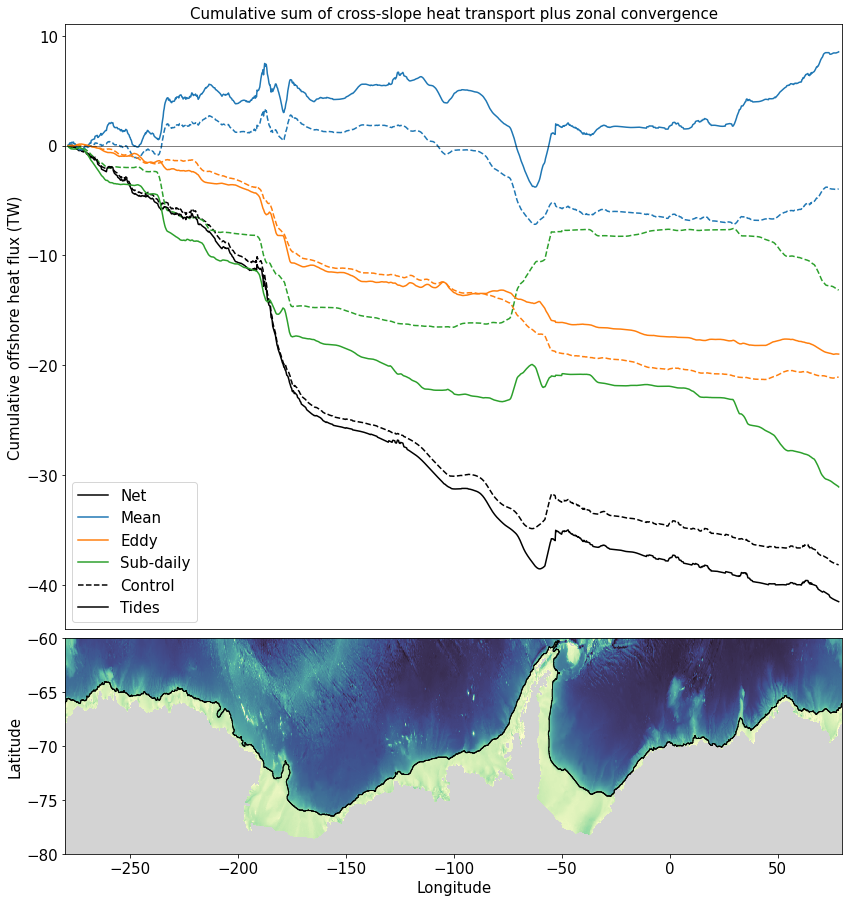

In [13]:
# plot this as total, and components of this: sub-daily, eddy, mean
fontsize = 15

# mean:
control_mean = cross_slope_heat_trans_mean_con + zonal_convergence_mean_con
tides_mean = cross_slope_heat_trans_mean_tides + zonal_convergence_mean_tides

# net:
control_net = cross_slope_heat_trans_online_con + zonal_convergence_online_con
tides_net = cross_slope_heat_trans_online_tides + zonal_convergence_online_tides

# eddy is daily minus mean:
control_eddy = cross_slope_heat_trans_daily_con + zonal_convergence_daily_con - control_mean
tides_eddy = cross_slope_heat_trans_daily_tides + zonal_convergence_daily_tides - tides_mean

# sub-daily is net minus daily:
control_subdaily = control_net - (cross_slope_heat_trans_daily_con + zonal_convergence_daily_con)
tides_subdaily = tides_net - (cross_slope_heat_trans_daily_tides + zonal_convergence_daily_tides)

fig=plt.figure(1,figsize=(12,12))

ax0 = fig.add_axes([0.05,0.31,0.9,0.7])

plt.plot(lon_bin_midpoints,np.cumsum(control_net)/1e12,'k',linestyle='--')
plt.plot(lon_bin_midpoints,np.cumsum(control_mean)/1e12,'C0',linestyle='--')
plt.plot(lon_bin_midpoints,np.cumsum(control_eddy)/1e12,'C1',linestyle='--')
plt.plot(lon_bin_midpoints,np.cumsum(control_subdaily)/1e12,'C2',linestyle='--')
#plt.plot(lon_bin_midpoints,np.cumsum(control_subdaily+control_mean)/1e12,'C3',label='Mean + Sub-daily')

plt.plot(lon_bin_midpoints,np.cumsum(tides_net)/1e12,'k',label='Net')
plt.plot(lon_bin_midpoints,np.cumsum(tides_mean)/1e12,'C0',label='Mean')
plt.plot(lon_bin_midpoints,np.cumsum(tides_eddy)/1e12,'C1',label='Eddy')
plt.plot(lon_bin_midpoints,np.cumsum(tides_subdaily)/1e12,'C2',label='Sub-daily')
#plt.plot(lon_bin_midpoints,np.cumsum(tides_subdaily+tides_mean)/1e12,'C3',linestyle='--')

# dummy labels for legend:
plt.plot([-290,-289],[0,0],'k',linestyle='--',label='Control')
plt.plot([-290,-289],[0,0],'k',label='Tides')

plt.ylabel('Cumulative offshore heat flux (TW)',fontsize=fontsize)
plt.plot([-280,80],[0,0],'k',linewidth=0.5)
plt.xlim((-280,80))
plt.xticks([])
plt.legend(fontsize=fontsize)
plt.tick_params(labelsize=fontsize)
plt.title('Cumulative sum of cross-slope heat transport plus zonal convergence',fontsize=fontsize)

ax0 = fig.add_axes([0.05,0.05,0.9,0.25])
plt.pcolormesh(ht.xt_ocean,ht.yt_ocean,ht,cmap=cmocean.deep)
plt.contourf(ht.xt_ocean, ht.yt_ocean,land_mask_masked,colors='lightgrey',zorder=2)
plt.scatter(lon_t[mask_x_transport_numbered>0],lat_t[mask_x_transport_numbered>0],c='k',s=1,edgecolor='none',zorder=2)
plt.scatter(lon_t[mask_y_transport_numbered>0],lat_t[mask_y_transport_numbered>0],c='k',s=1,edgecolor='none',zorder=2)
plt.xlabel('Longitude',fontsize=fontsize)
plt.ylabel('Latitude',fontsize=fontsize)
plt.tick_params(labelsize=fontsize)
plt.yticks([-80,-75,-70,-65,-60])
plt.ylim(-80,-60);

# save:
figure_path = figdir+'cross_slope_heat_transport_components_yrs'+year+'.png'
fig.savefig(figure_path, dpi=120,bbox_inches='tight', pad_inches=0.1)


In [ ]:
## TEST FOR VERONICA:

# plot this as total, and components of this: sub-daily, eddy, mean
fontsize = 15

# mean:
control_mean = cross_slope_heat_trans_mean_con + zonal_convergence_mean_con
tides_mean = cross_slope_heat_trans_mean_tides + zonal_convergence_mean_tides

# net:
control_net = cross_slope_heat_trans_online_con + zonal_convergence_online_con
tides_net = cross_slope_heat_trans_online_tides + zonal_convergence_online_tides

# eddy is daily minus mean:
control_eddy = cross_slope_heat_trans_daily_con + zonal_convergence_daily_con - control_mean
tides_eddy = cross_slope_heat_trans_daily_tides + zonal_convergence_daily_tides - tides_mean

# sub-daily is net minus daily:
control_subdaily = control_net - (cross_slope_heat_trans_daily_con + zonal_convergence_daily_con)
tides_subdaily = tides_net - (cross_slope_heat_trans_daily_tides + zonal_convergence_daily_tides)

fig=plt.figure(1,figsize=(12,12))

ax0 = fig.add_axes([0.05,0.31,0.9,0.7])

plt.plot(lon_bin_midpoints,np.cumsum(control_net)/1e12,'k',linestyle='--')
plt.plot(lon_bin_midpoints,np.cumsum(control_mean)/1e12,'C0',linestyle='--')
plt.plot(lon_bin_midpoints,np.cumsum(control_eddy)/1e12,'C1',linestyle='--')
plt.plot(lon_bin_midpoints,np.cumsum(control_subdaily)/1e12,'C2',linestyle='--')
#plt.plot(lon_bin_midpoints,np.cumsum(control_subdaily+control_mean)/1e12,'C3',label='Mean + Sub-daily')

plt.plot(lon_bin_midpoints,np.cumsum(tides_net)/1e12,'k',label='Net')
plt.plot(lon_bin_midpoints,np.cumsum(tides_mean)/1e12,'C0',label='Mean')
plt.plot(lon_bin_midpoints,np.cumsum(tides_eddy)/1e12,'C1',label='Eddy')
plt.plot(lon_bin_midpoints,np.cumsum(tides_subdaily)/1e12,'C2',label='Sub-daily')
#plt.plot(lon_bin_midpoints,np.cumsum(tides_subdaily+tides_mean)/1e12,'C3',linestyle='--')

# dummy labels for legend:
plt.plot([-290,-289],[0,0],'k',linestyle='--',label='Control')
plt.plot([-290,-289],[0,0],'k',label='Tides')

plt.ylabel('Cumulative offshore heat flux (TW)',fontsize=fontsize)
plt.plot([-280,80],[0,0],'k',linewidth=0.5)
plt.xlim((-280,80))
plt.xticks([])
plt.legend(fontsize=fontsize)
plt.tick_params(labelsize=fontsize)
plt.title('Cumulative sum of cross-slope heat transport plus zonal convergence',fontsize=fontsize)

ax0 = fig.add_axes([0.05,0.05,0.9,0.25])
plt.pcolormesh(ht.xt_ocean,ht.yt_ocean,ht,cmap=cmocean.deep)
plt.contourf(ht.xt_ocean, ht.yt_ocean,land_mask_masked,colors='lightgrey',zorder=2)
plt.scatter(lon_t[mask_x_transport_numbered>0],lat_t[mask_x_transport_numbered>0],c='k',s=1,edgecolor='none',zorder=2)
plt.scatter(lon_t[mask_y_transport_numbered>0],lat_t[mask_y_transport_numbered>0],c='k',s=1,edgecolor='none',zorder=2)
plt.xlabel('Longitude',fontsize=fontsize)
plt.ylabel('Latitude',fontsize=fontsize)
plt.tick_params(labelsize=fontsize)
plt.yticks([-80,-75,-70,-65,-60])
plt.ylim(-80,-60);

# save:
figure_path = figdir+'cross_slope_heat_transport_components_yrs'+year+'.png'
#fig.savefig(figure_path, dpi=120,bbox_inches='tight', pad_inches=0.1)


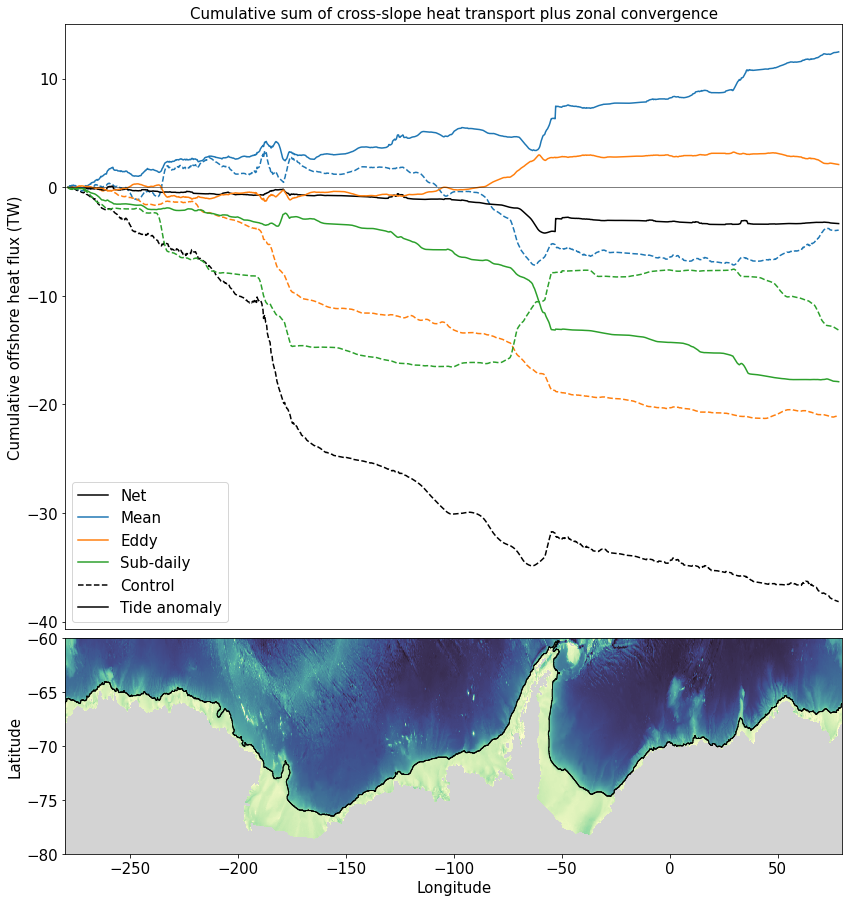

In [9]:
# plot tide simulation as anomalies from control
fontsize = 15

# mean:
control_mean = cross_slope_heat_trans_mean_con + zonal_convergence_mean_con
tides_mean = cross_slope_heat_trans_mean_tides + zonal_convergence_mean_tides

# net:
control_net = cross_slope_heat_trans_online_con + zonal_convergence_online_con
tides_net = cross_slope_heat_trans_online_tides + zonal_convergence_online_tides

# eddy is daily minus mean:
control_eddy = cross_slope_heat_trans_daily_con + zonal_convergence_daily_con - control_mean
tides_eddy = cross_slope_heat_trans_daily_tides + zonal_convergence_daily_tides - tides_mean

# sub-daily is net minus daily:
control_subdaily = control_net - (cross_slope_heat_trans_daily_con + zonal_convergence_daily_con)
tides_subdaily = tides_net - (cross_slope_heat_trans_daily_tides + zonal_convergence_daily_tides)

fig=plt.figure(1,figsize=(12,12))

ax0 = fig.add_axes([0.05,0.31,0.9,0.7])

plt.plot(lon_bin_midpoints,np.cumsum(control_net)/1e12,'k',linestyle='--')
plt.plot(lon_bin_midpoints,np.cumsum(control_mean)/1e12,'C0',linestyle='--')
plt.plot(lon_bin_midpoints,np.cumsum(control_eddy)/1e12,'C1',linestyle='--')
plt.plot(lon_bin_midpoints,np.cumsum(control_subdaily)/1e12,'C2',linestyle='--')
#plt.plot(lon_bin_midpoints,np.cumsum(control_subdaily+control_mean)/1e12,'C3',label='Mean + Sub-daily')

plt.plot(lon_bin_midpoints,np.cumsum(tides_net - control_net)/1e12,'k',label='Net')
plt.plot(lon_bin_midpoints,np.cumsum(tides_mean - control_mean)/1e12,'C0',label='Mean')
plt.plot(lon_bin_midpoints,np.cumsum(tides_eddy - control_eddy)/1e12,'C1',label='Eddy')
plt.plot(lon_bin_midpoints,np.cumsum(tides_subdaily - control_subdaily)/1e12,'C2',label='Sub-daily')
#plt.plot(lon_bin_midpoints,np.cumsum(tides_subdaily+tides_mean)/1e12,'C3',linestyle='--')

# dummy labels for legend:
plt.plot([-290,-289],[0,0],'k',linestyle='--',label='Control')
plt.plot([-290,-289],[0,0],'k',label='Tide anomaly')

plt.ylabel('Cumulative offshore heat flux (TW)',fontsize=fontsize)
plt.plot([-280,80],[0,0],'k',linewidth=0.5)
plt.xlim((-280,80))
plt.xticks([])
plt.legend(fontsize=fontsize)
plt.tick_params(labelsize=fontsize)
plt.title('Cumulative sum of cross-slope heat transport plus zonal convergence',fontsize=fontsize)

ax0 = fig.add_axes([0.05,0.05,0.9,0.25])
plt.pcolormesh(ht.xt_ocean,ht.yt_ocean,ht,cmap=cmocean.deep)
plt.contourf(ht.xt_ocean, ht.yt_ocean,land_mask_masked,colors='lightgrey',zorder=2)
plt.scatter(lon_t[mask_x_transport_numbered>0],lat_t[mask_x_transport_numbered>0],c='k',s=1,edgecolor='none',zorder=2)
plt.scatter(lon_t[mask_y_transport_numbered>0],lat_t[mask_y_transport_numbered>0],c='k',s=1,edgecolor='none',zorder=2)
plt.xlabel('Longitude',fontsize=fontsize)
plt.ylabel('Latitude',fontsize=fontsize)
plt.tick_params(labelsize=fontsize)
plt.yticks([-80,-75,-70,-65,-60])
plt.ylim(-80,-60);

# save:
figure_path = figdir+'cross_slope_heat_transport_components_anomalies_yrs'+year+'.png'
fig.savefig(figure_path, dpi=120,bbox_inches='tight', pad_inches=0.1)


### Notes:

This is interesting, you actually miss quite a bit by only using daily averages. Need to have a think about this more, but I think I am calculating them in the same way (except maybe linear interpolation of temp/v vs mdppm tracer advection scheme?), so the only difference is the time averaging. There is also a spatial pattern in the difference, which is mostly correlated with dense water regions. That makes sense that those regions would have sub-daily correlations given the timescales of the overflows.

Next: 
1. Do longer averaging periods (5 years?) and different isobaths.
2. Ideally I could separate this into density layers, but I only have temp_yflux_adv saved at monthly frequency, so can't do the binning properly. Perhaps test how much is lost by binning using monthly density fields? Or run another year saving temp_yflux_adv with daily output for both control and tide run.

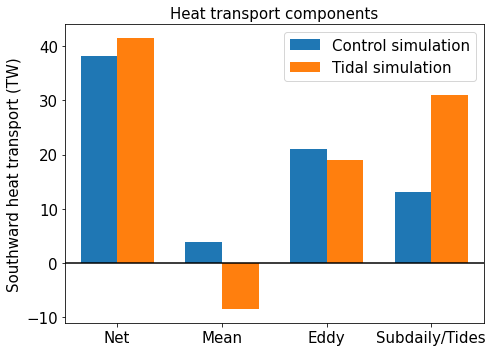

In [40]:
'''control_mean = cross_slope_heat_trans_mean_con + zonal_convergence_mean_con
tides_mean = cross_slope_heat_trans_mean_tides + zonal_convergence_mean_tides

# net:
control_net = cross_slope_heat_trans_online_con + zonal_convergence_online_con
tides_net = cross_slope_heat_trans_online_tides + zonal_convergence_online_tides

# eddy is daily minus mean:
control_eddy = cross_slope_heat_trans_daily_con + zonal_convergence_daily_con - control_mean
tides_eddy = cross_slope_heat_trans_daily_tides + zonal_convergence_daily_tides - tides_mean

# sub-daily is net minus daily:
control_subdaily = control_net - (cross_slope_heat_trans_daily_con + zonal_convergence_daily_con)
tides_subdaily = tides_net - (cross_slope_heat_trans_daily_tides + zonal_convergence_daily_tides)'''

labels = ['Net', 'Mean', 'Eddy', 'Subdaily/Tides']
con_means = [-np.sum(control_net)/1e12, -np.sum(control_mean)/1e12, -np.sum(control_eddy)/1e12, -np.sum(control_subdaily)/1e12]
tides_means = [-np.sum(tides_net)/1e12, -np.sum(tides_mean)/1e12, -np.sum(tides_eddy)/1e12, -np.sum(tides_subdaily)/1e12]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(7,5))
rects1 = ax.bar(x - width/2, con_means, width, label='Control simulation')
rects2 = ax.bar(x + width/2, tides_means, width, label='Tidal simulation')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Southward heat transport (TW)',fontsize=fontsize)
ax.set_title('Heat transport components',fontsize=fontsize)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize=fontsize)
plt.tick_params(labelsize=fontsize)
plt.plot([-1,4],[0,0],'k')
plt.xlim(-.5,3.5)

fig.tight_layout()

figure_path = figdir+'cross_slope_heat_transport_components_bargraph_yrs'+year+'.png'
fig.savefig(figure_path, dpi=120,bbox_inches='tight', pad_inches=0.1)


In [46]:
np.sum(tides_net)-np.sum(control_net)
(np.sum(control_subdaily) - np.sum(tides_subdaily))/1e12

<xarray.DataArray ()>
array(17.90633848)

In [ ]:
# 3.3 TW net increase
# 18 TW tides increase
